In [5]:
import pandas as pd 

df=pd.read_csv('transfer_window.csv', sep=';')


In [6]:
import matplotlib.pyplot2 as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [38]:
#data preparation club two sided barchart,  ciao 
in_transfer=df.groupby(by=["club_to"]).sum(['fee'])
in_transfer=in_transfer.rename(columns={"fee": "expenditure"})
in_transfer['id']=in_transfer.index

out_transfer=df.groupby(by=["club_from"]).sum(['fee'])
out_transfer['id']=out_transfer.index
out_transfer=out_transfer.rename(columns={"fee": "revenue"})

balance=out_transfer.merge(in_transfer, how='inner', on='id')
balance=balance.loc[:,['id', 'revenue','expenditure']]
balance['expenditure'] = balance['expenditure']*(-1)

balance=balance.sort_values(by=['expenditure'])
balance_20=balance.head(20)

In [39]:
balance_20

,id,revenue,expenditure
58,Chelsea FC,65500000,-610000000
137,Manchester United,3000000,-241000000
24,Arsenal FC,23000000,-191000000
223,West Ham United,20000000,-191000000
144,Newcastle United,2000000,-183000000
205,Tottenham Hotspur,38500000,-177000000
146,Nottingham Forest,5000000,-175000000
224,Wolverhampton Wanderers,58000000,-172000000
82,FC Barcelona,39000000,-158000000
136,Manchester City,156000000,-150000000


<IPython.core.display.Javascript object>


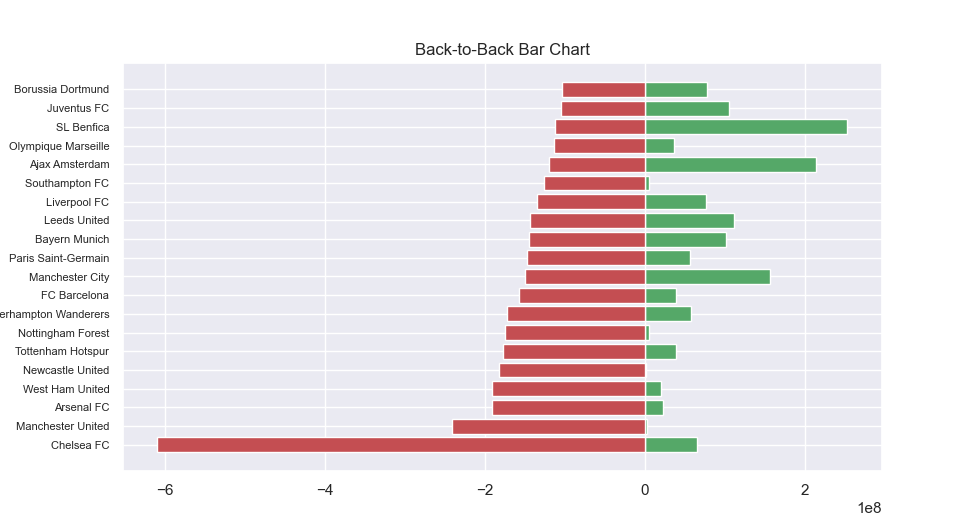

In [43]:
# plot the bars
plt.barh(balance_20['id'], balance_20['revenue'], color = 'g')
plt.barh(balance_20['id'], balance_20['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

In [30]:
#change nation variable
lst=['Italy','England','France', 'Spain','Germany']
for index,row in df.iterrows():
    if row['country_to'] not in lst:
        row['country_to']='Other'
    if row['country_from'] not in lst:
        row['country_from']='Other'

In [36]:
#data preparation nation two sided barchart
in_transfer_n=df.groupby(by=["country_to"]).sum(['fee'])
in_transfer_n=in_transfer_n.rename(columns={"fee": "expenditure"})
in_transfer_n['id']=in_transfer_n.index

out_transfer_n=df.groupby(by=["country_from"]).sum(['fee'])
out_transfer_n['id']=out_transfer_n.index
out_transfer_n=out_transfer_n.rename(columns={"fee": "revenue"})

balance_n=out_transfer_n.merge(in_transfer_n, how='inner', on='id')
balance_n=balance_n.loc[:,['id', 'revenue','expenditure']]
balance_n['expenditure'] = balance_n['expenditure']*(-1)

balance_n=balance_n.sort_values(by=['expenditure'])
balance_20_n=balance_n.head(10)
balance_20_n

,id,revenue,expenditure
10,England,1225500000,-3108250000
16,Italy,897070000,-779180000
11,France,680850000,-604750000
27,Spain,552350000,-537950000
12,Germany,571300000,-505700000
21,Portugal,584300000,-217000000
19,Netherlands,434150000,-176200000
3,Brazil,189890000,-116490000
29,Turkey,101850000,-114670000
2,Belgium,207100000,-107100000


<IPython.core.display.Javascript object>


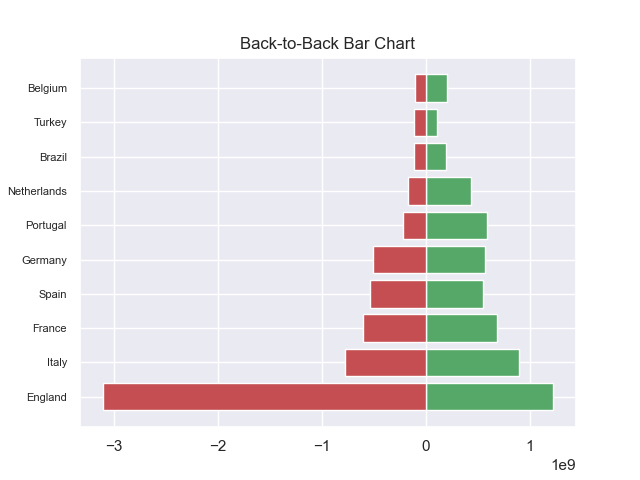

In [44]:
# plot the bars
plt.barh(balance_20_n['id'], balance_20_n['revenue'], color = 'g')
plt.barh(balance_20_n['id'], balance_20_n['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

In [7]:
#Sankey chart

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [8]:
#Sankey chart data 
df_sorted=df.sort_values(by=['fee'], ascending=False)
df_top=df_sorted.head(10)
df_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1230,1,Enzo Fernández,Central Midfield,22,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Chelsea FC,121000000
1229,2,Antony,Right Winger,22,35000000,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95000000
1228,20,Darwin Núñez,Centre-Forward,23,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,80000000
1227,4,Aurélien Tchouameni,Defensive Midfield,22,60000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80000000
1226,3,Wesley Fofana,Centre-Back,21,40000000,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80000000
1225,7,Alexander Isak,Centre-Forward,22,30000000,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70000000
1224,6,Mykhaylo Mudryk,Left Winger,22,40000000,Ukraine,Premier Liga,Shakhtar Donetsk,England,Premier League,Chelsea FC,70000000
1223,5,Casemiro,Defensive Midfield,30,40000000,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70000000
1222,8,Matthijs de Ligt,Centre-Back,22,70000000,Italy,Serie A,Juventus FC,Germany,Bundesliga,Bayern Munich,67000000
1221,13,Marc Cucurella,Left-Back,24,28000000,England,Premier League,Brighton & Hove Albion,England,Premier League,Chelsea FC,65000000


<IPython.core.display.Javascript object>


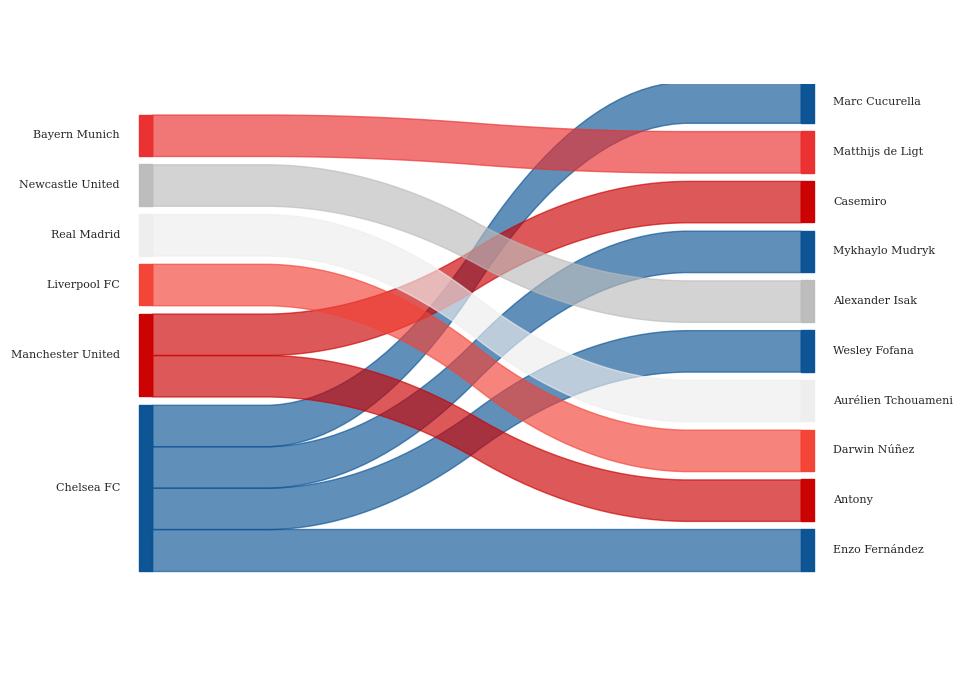

In [16]:
colorDict = {
    "Bayern Munich": "#ea2f2f",
    "Newcastle United": "#bcbcbc",
    "Real Madrid": "#eeeeee",
    "Liverpool FC": "#f44336",
    "Manchester United": "#cc0000",
    "Chelsea FC":'#0b5394',
    'Enzo Fernández': "#0b5394",
    'Antony': "#cc0000",
    'Darwin Núñez': "#f44336",
    'Aurélien Tchouameni': "#eeeeee",
   'Wesley Fofana': "#0b5394",
    'Alexander Isak': "#bcbcbc",
    'Mykhaylo Mudryk': "#0b5394",
    'Casemiro': "#cc0000",
    'Matthijs de Ligt': "#ea2f2f",
    'Marc Cucurella': "#0b5394"
}


sankey(df_top['club_to'], df_top["name"], colorDict=colorDict,  fontsize=8)
#sankey(df_top['club_from'], df_top["name"], fontsize=8)
#sankey(df_top['league_to'], df_top["name"], fontsize=8)

<IPython.core.display.Javascript object>


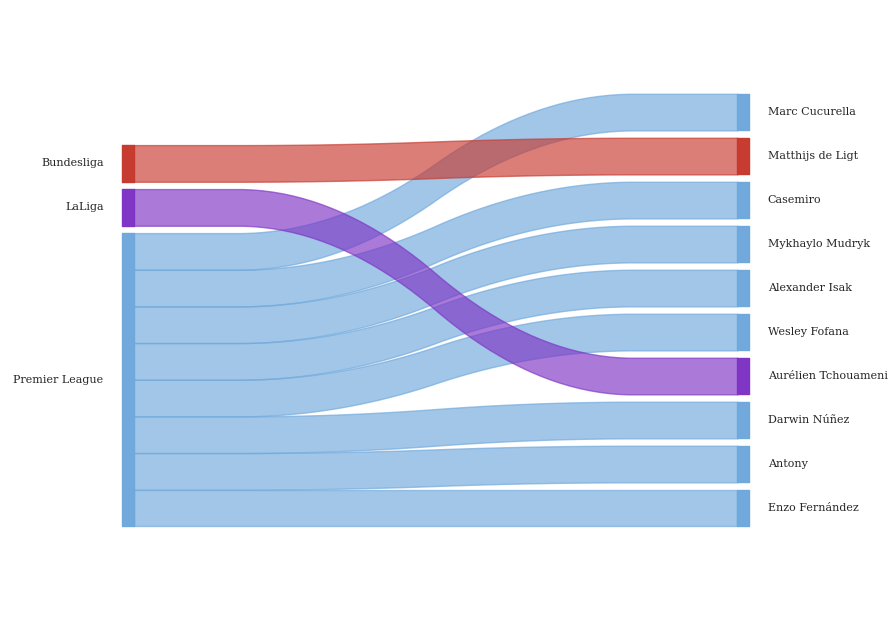

In [13]:
colorDict2 = {
    "Bundesliga": "#c7392e",
    "LaLiga": "#7e33c5",
    "Premier League": "#6fa8dc",
    'Enzo Fernández': "#6fa8dc",
    'Antony': "#6fa8dc",
    'Darwin Núñez': "#6fa8dc",
    'Aurélien Tchouameni': "#7e33c5",
   'Wesley Fofana': "#6fa8dc",
    'Alexander Isak': "#6fa8dc",
    'Mykhaylo Mudryk': "#6fa8dc",
    'Casemiro': "#6fa8dc",
    'Matthijs de Ligt': "#c7392e",
    'Marc Cucurella': "#6fa8dc"
}
sankey(df_top['league_to'], df_top["name"], colorDict=colorDict2, fontsize=8)